# Customer Personality Analysis
**An analysis of a company's ideal customers by Group ALGORITHM  <br> of the Hamoye Data Science Internship Programme**

## Introduction
### Problem Statement
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Content
### Attributes

#### People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

#### Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Target
**Need to perform clustering to summarize customer segments.**

### Import libraries and load dataset

In [223]:
# data analysis libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import plotly.express as px

# machine learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [224]:
# read csv file into notebook
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [123]:
# concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [124]:
# checking for nulls
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [125]:
# confirming nulls are gone
df = df.dropna()
df.isnull().sum().any()
print('There are no null values left')

There are no null values left


In [126]:
# checking for categorical features
cat_cols = df.select_dtypes(include='object').columns
for cat in cat_cols:
    print(f'\nValue counts for: {cat}\n\n {df[cat].value_counts()}')
    print('-' * 100)


Value counts for: Education

 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
----------------------------------------------------------------------------------------------------

Value counts for: Marital_Status

 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
----------------------------------------------------------------------------------------------------

Value counts for: Dt_Customer

 31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 662, dtype: int64
----------------------------------------------------------------------------------------------------


## Feature Engineering

In [127]:
# customer age: since the customer registration with the company was between 2012 and 2014, we assume that the data was collected in January 2015 for simplicity.
df['Age'] = 2015 - df['Year_Birth']

# total spending
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# total number of dependents in each customer's household
# df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + 1 # marital status may be included.
df['No_of_Dependents'] = df['Kidhome'] + df['Teenhome']

# total number of campaigns accepted by each customer
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Total_Acceptance'] = df[campaign_cols].sum(axis=1)

# number of months since each customer's enrollment with the company until the current date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Months_of_Enrollment'] = ((pd.Timestamp('2015-01-01') - df['Dt_Customer']) / np.timedelta64(1, 'M')).astype(int)

# most frequent purchasing channel
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Purchasing_Channel'] = df[purchase_cols].idxmax(axis=1).str.replace('Num', '')

# total purchases
total_purchases_col = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
df['Total_Purchases'] = df[total_purchases_col].sum(axis=1)

# website activity
website_cols = ['NumWebPurchases', 'NumWebVisitsMonth']
df['Website_Activity'] = df[website_cols].sum(axis=1)

# total number of campaigns responded to by each customer
response_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Campaign_Response'] = df[response_cols].sum(axis=1)

# marital status new
df['Marital_Status_New'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Single': 'No_Partner',
    'Divorced': 'No_Partner',
    'Widow': 'No_Partner',
    'Alone': 'No_Partner',
    'Absurd': 'No_Partner',
    'YOLO': 'No_Partner'
})

# education level
df['Education_Level'] = df['Education'].replace({
    'Graduation': 'Graduate',
    'PhD': 'Post_Graduate',
    'Master': 'Post_Graduate',
    '2n Cycle': 'Undergraduate',
    'Basic': 'Undergraduate'
})

# parental status
df['Parent_Status'] = ((df['Kidhome'] > 0) | (df['Teenhome'] > 0)).astype(int)

df['Income_Ratio'] = df['Total_Spending'] / df['Income']

# dropping redundant columns
df = df.drop([
    'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Dt_Customer',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Response', 'Marital_Status', 'Education',
    'Z_CostContact', 'Z_Revenue', 'NumWebVisitsMonth', 'NumDealsPurchases'
], axis=1)

An explanation of the new columns engineered in the code above:
1. Age: The "Age" column represents the age of each customer. It is calculated by subtracting the "Year_Birth" column from the year 2015, assuming the data was collected in January 2015 for simplicity.
2. Total_Spending: The "Total_Spending" column represents the total amount spent by each customer on various product categories. It is obtained by summing up the spending columns, including "MntWines," "MntFruits," "MntMeatProducts," "MntFishProducts," "MntSweetProducts," and "MntGoldProds."
3. No_of_Dependents: The "No_of_Dependents" column represents the total number of dependents in each customer's household. It is calculated by adding the "Kidhome" and "Teenhome" columns.
4. Total_Acceptance: The "Total_Acceptance" column represents the total number of marketing campaigns accepted by each customer. It is obtained by summing up the acceptance columns, including "AcceptedCmp1," "AcceptedCmp2," "AcceptedCmp3," "AcceptedCmp4," and "AcceptedCmp5."
5. Months_of_Enrollment: The "Months_of_Enrollment" column represents the number of months since each customer enrolled with the company until the current date. It is calculated by subtracting the customer's enrollment date (stored in the "Dt_Customer" column) from January 1, 2015, and converting the resulting time difference to the number of months.
6. Purchasing_Channel: The "Purchasing_Channel" column represents the most frequent purchasing channel used by each customer. It is determined by identifying the column with the highest value among "NumWebPurchases," "NumCatalogPurchases," and "NumStorePurchases" and removing the "Num" prefix.
7. Total_Purchases: The "Total_Purchases" column represents the total number of purchases made by each customer. It is obtained by summing up the columns related to different purchase types, including "NumWebPurchases," "NumCatalogPurchases," "NumStorePurchases," and "NumDealsPurchases."
8. Website_Activity: The "Website_Activity" column represents the overall activity of customers on the company's website. It is calculated by summing up the columns "NumWebPurchases" and "NumWebVisitsMonth."
9. Campaign_Response: The "Campaign_Response" column represents the total number of campaigns responded to by each customer. It is obtained by summing up the response columns, including "AcceptedCmp1," "AcceptedCmp2," "AcceptedCmp3," "AcceptedCmp4," "AcceptedCmp5," and "Response."
10. Marital_Status_New: The "Marital_Status_New" column represents a new categorization of marital status. It replaces the original marital status values with new labels, such as "Partner" for "Married" and "Together," and "No_Partner" for other statuses like "Single," "Divorced," "Widow," "Alone," "Absurd," and "YOLO."
11. Education_Level: The "Education_Level" column represents a new categorization of education level. It replaces the original education values with simplified labels, such as "Graduate" for "Graduation," "Post_Graduate" for "PhD" and "Master," and "Undergraduate" for "2n Cycle" and "Basic."
12. Parent_Status: The "Parent_Status" column represents the parental status of each customer. It is calculated by checking if a customer has at least one child at home (indicated by a value greater than 0 in the "Kidhome" column) or at least one teenager at home (indicated by a value greater than 0 in the "Teenhome" column).
13. Income_Ratio: The "Income_Ratio" column represents the ratio of total spending to income for each customer. It is calculated by dividing the "Total_Spending" column by the "Income" column.

Finally, the code drops several redundant columns that are no longer needed for analysis, such as columns related to birth year, spending amounts, household information, campaign acceptance, customer enrollment date, website visits, response, marital status, education, and others. These columns are dropped using the drop() function with the specified column names and the `axis=1` parameter to indicate that the columns should be dropped.

In the code above to get `Months_of_Enrollment`, we first convert the 'Dt_Customer' column to a datetime format using pd.to_datetime(). Then, we calculate the difference between the date '2015-01-01' (converted to a Timestamp object) and each customer's enrollment date. By dividing the result by np.timedelta64(1, 'M'), we obtain the number of months. Finally, we cast the result to an integer using .astype(int).

In [128]:
# random samples of the dataset
df.sample(10)

ID   Income  Recency  Complain  Age  Total_Spending  \
2190   4418  89616.0       36         0   32            1644   
194     326  51148.0       38         0   42             315   
389    9799  83664.0       57         0   47            1173   
2032   8625  17649.0       70         0   39              45   
2101   6544  67911.0       63         0   66             976   
994    1640  64587.0       49         0   61             108   
1395   4405  63915.0        2         0   59             789   
870   10140  70123.0       27         0   32            1727   
214       0  70951.0       66         0   30            1198   
1594   1131  52569.0       54         0   48              95   

      No_of_Dependents  Total_Acceptance  Months_of_Enrollment  \
2190                 0                 0                    22   
194                  2                 0                    22   
389                  2                 0                    16   
2032                 1                 0                    12   
2101                 1                 0                     7   
994                  2                 0                     6   
1395                 2                 0                    17   
870                  0                 2                    15   
214                  0                 0                    20   
1594                 1                 0                     7   

     Purchasing_Channel  Total_Purchases  Website_Activity  Campaign_Response  \
2190     StorePurchases               25                 9                  1   
194      StorePurchases               16                11                  0   
389      StorePurchases               19                 7                  0   
2032       WebPurchases                9                11                  0   
2101     StorePurchases               27                 9                  0   
994      StorePurchases                8                 4                  0   
1395     StorePurchases               23                11                  0   
870    CatalogPurchases               17                 8                  2   
214      StorePurchases               17                 4                  0   
1594     StorePurchases                7                 5                  0   

     Marital_Status_New Education_Level  Parent_Status  Income_Ratio  
2190         No_Partner   Post_Graduate              0      0.018345  
194             Partner        Graduate              1      0.006159  
389          No_Partner   Post_Graduate              1      0.014020  
2032            Partner        Graduate              1      0.002550  
2101            Partner   Post_Graduate              1      0.014372  
994          No_Partner        Graduate              1      0.001672  
1395            Partner   Post_Graduate              1      0.012345  
870             Partner   Post_Graduate              0      0.024628  
214             Partner        Graduate              0      0.016885  
1594         No_Partner   Post_Graduate              1      0.001807

In [129]:
# Generate descriptive statistics.
df.describe()

ID         Income      Recency     Complain          Age  \
count   2216.000000    2216.000000  2216.000000  2216.000000  2216.000000   
mean    5588.353339   52247.251354    49.012635     0.009477    46.179603   
std     3249.376275   25173.076661    28.948352     0.096907    11.985554   
min        0.000000    1730.000000     0.000000     0.000000    19.000000   
25%     2814.750000   35303.000000    24.000000     0.000000    38.000000   
50%     5458.500000   51381.500000    49.000000     0.000000    45.000000   
75%     8421.750000   68522.000000    74.000000     0.000000    56.000000   
max    11191.000000  666666.000000    99.000000     1.000000   122.000000   

       Total_Spending  No_of_Dependents  Total_Acceptance  \
count     2216.000000       2216.000000       2216.000000   
mean       607.075361          0.947202          0.298285   
std        602.900476          0.749062          0.679209   
min          5.000000          0.000000          0.000000   
25%         69.000000          0.000000          0.000000   
50%        396.500000          1.000000          0.000000   
75%       1048.000000          1.000000          0.000000   
max       2525.000000          3.000000          4.000000   

       Months_of_Enrollment  Total_Purchases  Website_Activity  \
count           2216.000000      2216.000000       2216.000000   
mean              17.172834        14.880866          9.404332   
std                7.642072         7.670957          3.565683   
min                0.000000         0.000000          0.000000   
25%               12.000000         8.000000          7.000000   
50%               17.000000        15.000000          9.000000   
75%               23.000000        21.000000         11.000000   
max               35.000000        44.000000         28.000000   

       Campaign_Response  Parent_Status  Income_Ratio  
count        2216.000000    2216.000000   2216.000000  
mean            0.448556       0.714350      0.009912  
std             0.892440       0.451825      0.016816  
min             0.000000       0.000000      0.000039  
25%             0.000000       0.000000      0.002346  
50%             0.000000       1.000000      0.008005  
75%             1.000000       1.000000      0.015533  
max             5.000000       1.000000      0.706988

In [130]:
# concise summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2216 non-null   int64  
 1   Income                2216 non-null   float64
 2   Recency               2216 non-null   int64  
 3   Complain              2216 non-null   int64  
 4   Age                   2216 non-null   int64  
 5   Total_Spending        2216 non-null   int64  
 6   No_of_Dependents      2216 non-null   int64  
 7   Total_Acceptance      2216 non-null   int64  
 8   Months_of_Enrollment  2216 non-null   int32  
 9   Purchasing_Channel    2216 non-null   object 
 10  Total_Purchases       2216 non-null   int64  
 11  Website_Activity      2216 non-null   int64  
 12  Campaign_Response     2216 non-null   int64  
 13  Marital_Status_New    2216 non-null   object 
 14  Education_Level       2216 non-null   object 
 15  Parent_Status        

## Exploratory Data Analysis

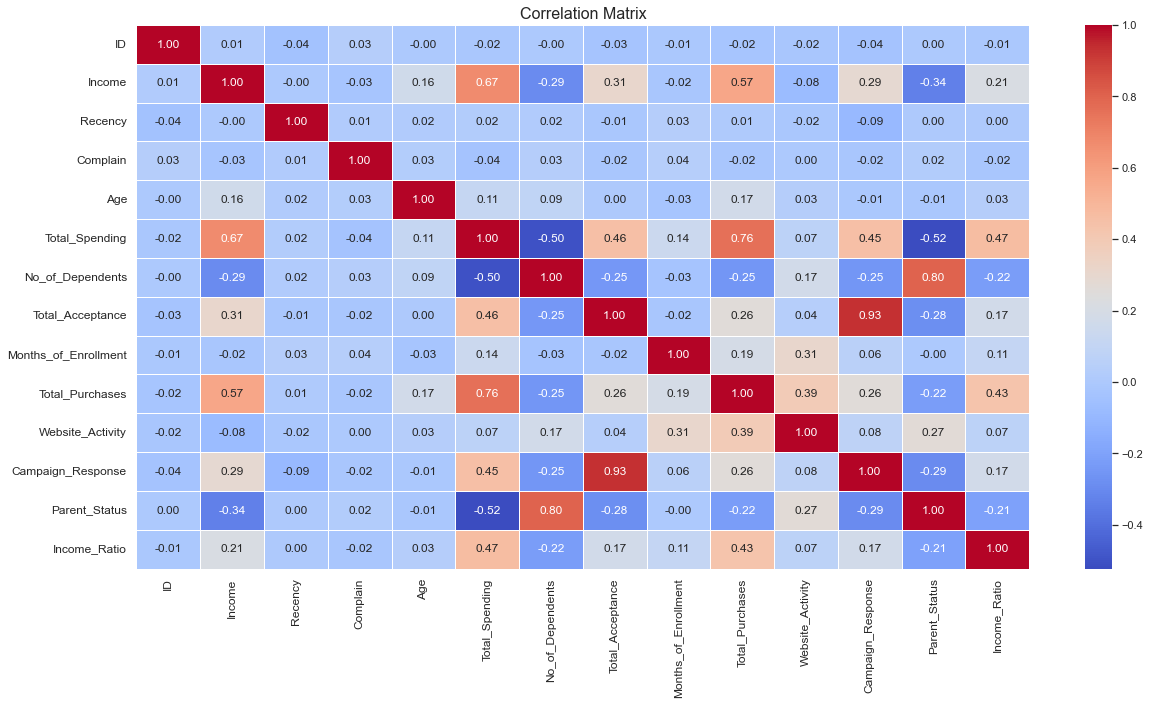

In [131]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=[20, 10])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

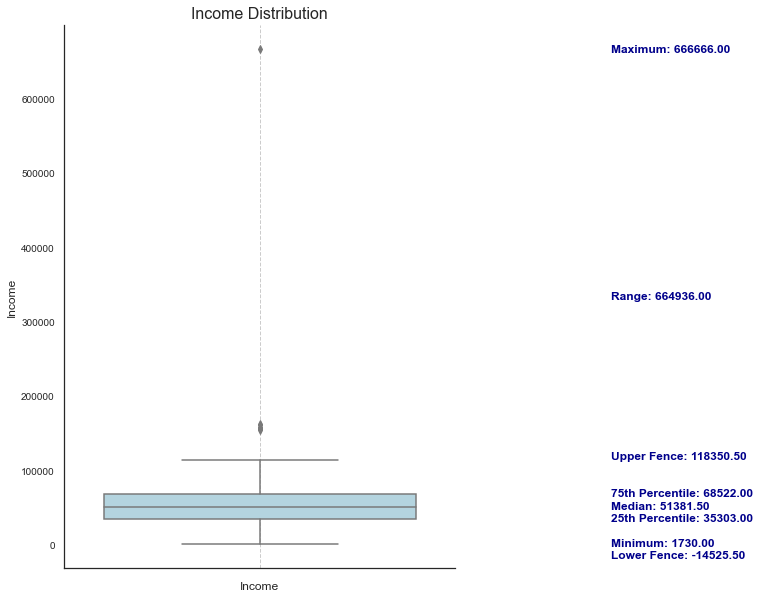

In [132]:
# income distribution
plt.figure(figsize=[7, 10])
sns.boxplot(y=df['Income'], color='lightblue', linewidth=1.5)

age_stats = df['Income'].describe()
q1 = age_stats['25%']
q3 = age_stats['75%']
median = age_stats['50%']
min_val = age_stats['min']
max_val = age_stats['max']
range_val = max_val - min_val

iqr = q3 - q1
outliers_income = df[(df['Income'] < q1 - 1.5 * iqr) | (df['Income'] > q3 + 1.5 * iqr)]['Income']

plt.text(0.9, q1, f'25th Percentile: {q1:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, median, f'Median: {median:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, q3, f'75th Percentile: {q3:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, min_val, f'Minimum: {min_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, max_val, f'Maximum: {max_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, min_val + (range_val / 2), f'Range: {range_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')

lower_fence = q1 - 1.5 * iqr
plt.text(0.9, lower_fence, f'Lower Fence: {lower_fence:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
upper_fence = q3 + 1.5 * iqr
plt.text(0.9, upper_fence, f'Upper Fence: {upper_fence:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')

plt.title('Income Distribution', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--')
sns.despine()
plt.show();

we can see there are outliers in the Income

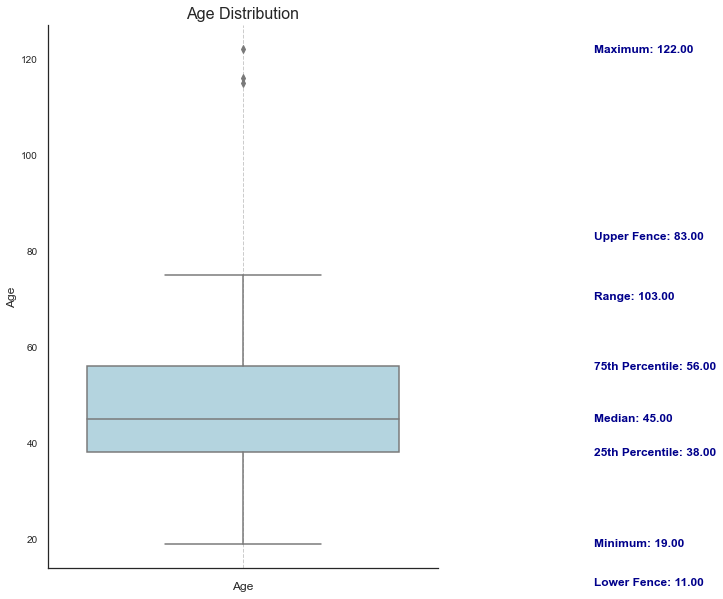

In [133]:
# Age distribution
plt.figure(figsize=[7, 10])
sns.boxplot(y=df['Age'], color='lightblue', linewidth=1.5)

age_stats = df['Age'].describe()
q1 = age_stats['25%']
q3 = age_stats['75%']
median = age_stats['50%']
min_val = age_stats['min']
max_val = age_stats['max']
range_val = max_val - min_val

iqr = q3 - q1
outliers_age = df[(df['Age'] < q1 - 1.5 * iqr) | (df['Age'] > q3 + 1.5 * iqr)]['Age']

plt.text(0.9, q1, f'25th Percentile: {q1:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, median, f'Median: {median:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, q3, f'75th Percentile: {q3:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, min_val, f'Minimum: {min_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, max_val, f'Maximum: {max_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, min_val + (range_val / 2), f'Range: {range_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')

lower_fence = q1 - 1.5 * iqr
plt.text(0.9, lower_fence, f'Lower Fence: {lower_fence:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
upper_fence = q3 + 1.5 * iqr
plt.text(0.9, upper_fence, f'Upper Fence: {upper_fence:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')

plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--')
sns.despine()
plt.show();

we can see there are outliers in the Age

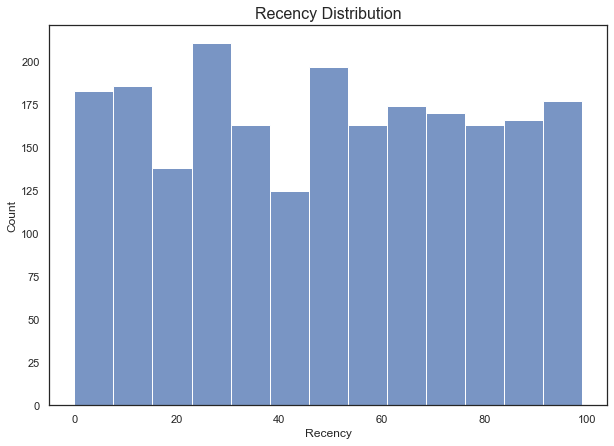

In [134]:
# Recency distribution
plt.figure(figsize=[10, 7])
sns.histplot(data=df, x='Recency')
plt.title('Recency Distribution', fontsize=16)
plt.show();

<Figure size 720x504 with 0 Axes>

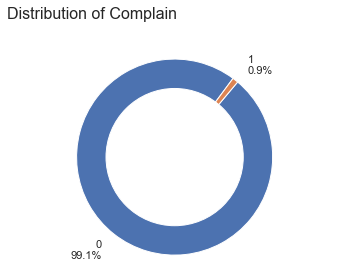

In [135]:
# Complain distribution
plt.figure(figsize=[10, 7])
counts = df['Complain'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Complain', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

A vast majority of the customers did not complain in the last two years.

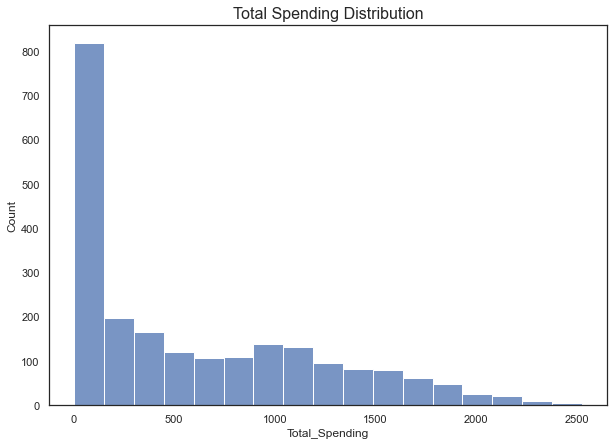

In [136]:
# total spending
plt.figure(figsize=[10, 7])
sns.histplot(data=df, x='Total_Spending')
plt.title('Total Spending Distribution', fontsize=16)
plt.show();

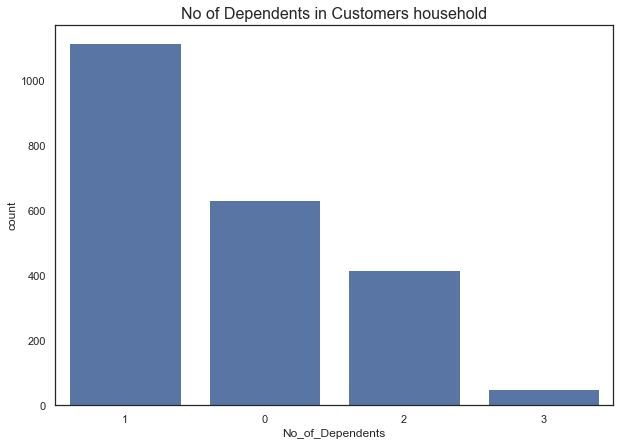

In [137]:
# family size dist
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
order = df['No_of_Dependents'].value_counts().index
sns.countplot(df['No_of_Dependents'], color=color, order=order)
plt.title('No of Dependents in Customers household', fontsize=16)
plt.show();

Majority of the customers have a single dependent.

<Figure size 720x504 with 0 Axes>

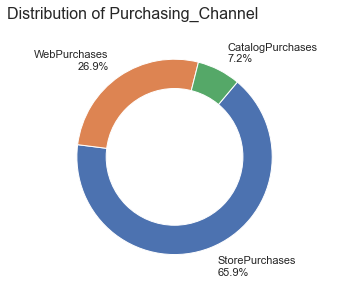

In [138]:
# Purchasing_Channel distribution
plt.figure(figsize=[10, 7])
counts = df['Purchasing_Channel'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Purchasing_Channel', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

Majority of the customers made purchases via the Store.

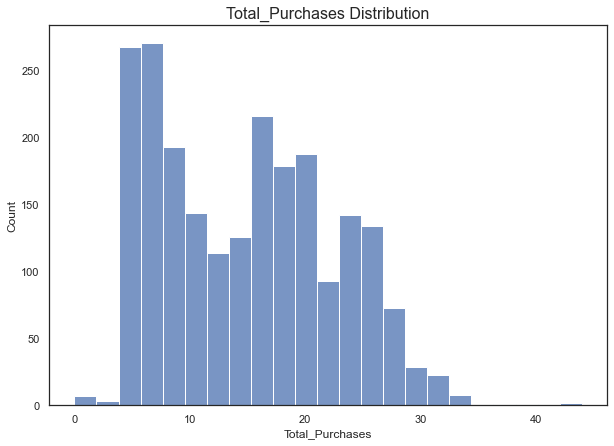

In [139]:
# total Total_Purchases
plt.figure(figsize=[10, 7])
sns.histplot(data=df, x='Total_Purchases')
plt.title('Total_Purchases Distribution', fontsize=16)
plt.show();

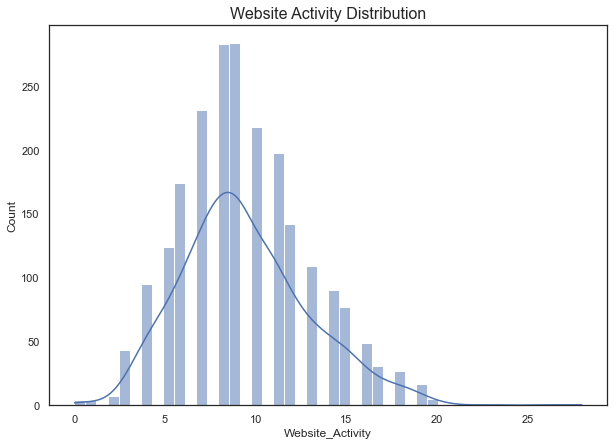

In [140]:
# Website_Activity dist
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
sns.histplot(df['Website_Activity'], color=color, kde=True)
plt.title('Website Activity Distribution', fontsize=16)
plt.show();

The Website Activity distribution is positively skewed

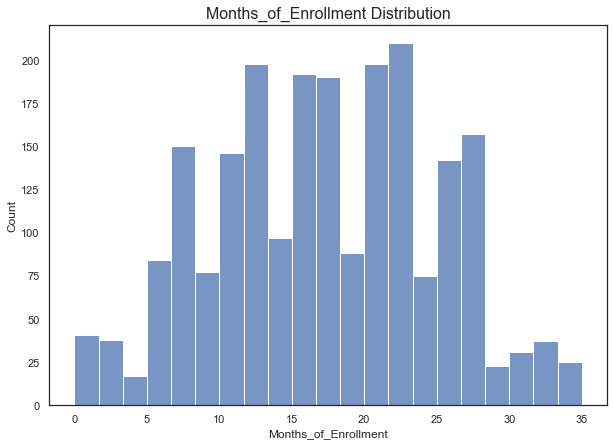

In [141]:
# Months_of_Enrollment distribution
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
sns.histplot(df['Months_of_Enrollment'], color=color)
plt.title('Months_of_Enrollment Distribution', fontsize=16)
plt.show();

Most customers enrolled between 20 and 25 months ago

<Figure size 720x504 with 0 Axes>

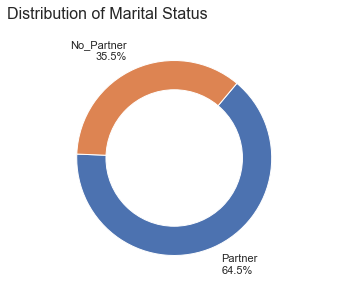

In [142]:
# Marital_Status_New distribution
plt.figure(figsize=[10, 7])
counts = df['Marital_Status_New'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Marital Status', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

Majority of the customers have partners.

<Figure size 720x504 with 0 Axes>

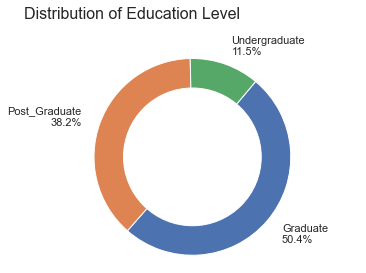

In [143]:
# Education_Level distribution
plt.figure(figsize=[10, 7])
counts = df['Education_Level'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Education Level', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

Majority of the customers have are Graduates.

<Figure size 720x504 with 0 Axes>

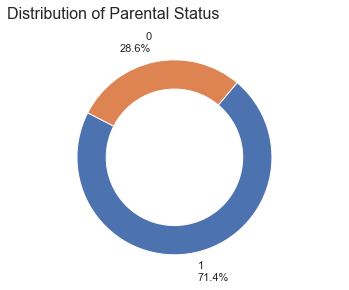

In [144]:
# Parent_Status distribution
plt.figure(figsize=[10, 7])
counts = df['Parent_Status'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Parental Status', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

Majority of the customers are parents.

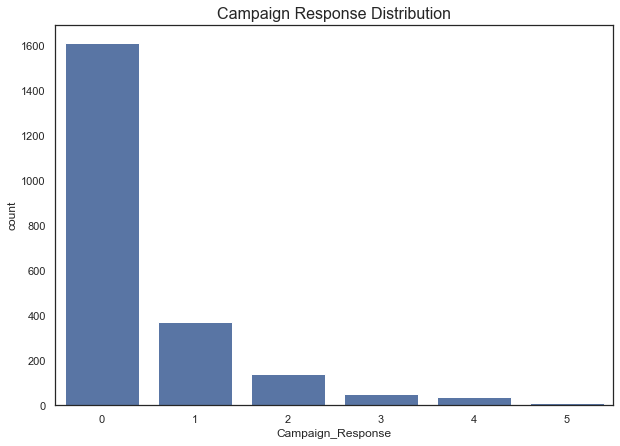

In [145]:
# Campaign_Response dist
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
order = df['Campaign_Response'].value_counts().index
sns.countplot(df['Campaign_Response'], color=color, order=order)
plt.title('Campaign Response Distribution', fontsize=16)
plt.show();

Customers that didn't respond to campaigns are the majority.

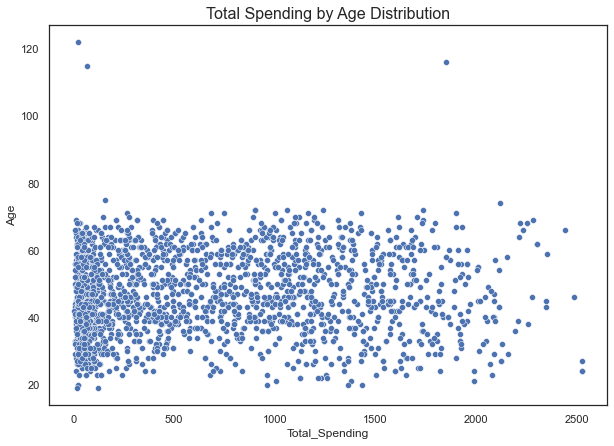

In [146]:
# Total Spending by Age Distribution
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
sns.scatterplot(data=df, x='Total_Spending', y='Age',  color=color)
plt.title('Total Spending by Age Distribution', fontsize=16)
plt.show();

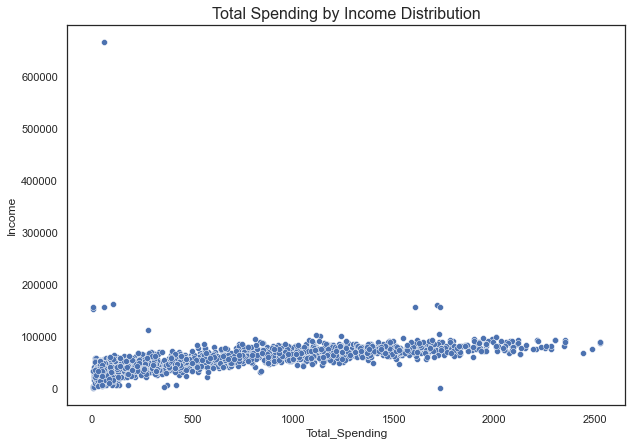

In [147]:
# Total Spending by Income Distribution
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
sns.scatterplot(data=df, x='Total_Spending',  y='Income',  color=color)
plt.title('Total Spending by Income Distribution', fontsize=16)
plt.show();

The Income of customers is positively correlated with the total ampount they have spent.

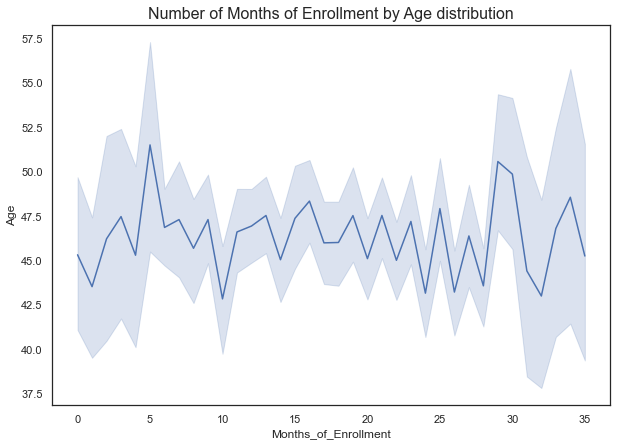

In [148]:
# Days of Enrollment by Age distribution
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
sns.lineplot(data=df, x='Months_of_Enrollment',  y='Age',  color=color)
plt.title('Number of Months of Enrollment by Age distribution', fontsize=16)
plt.show();

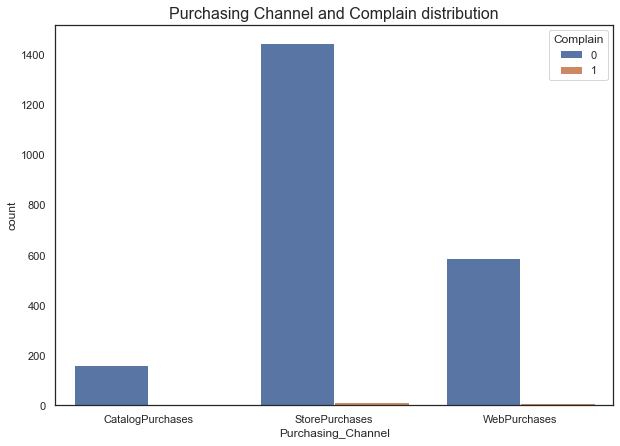

In [149]:
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
sns.countplot(data=df, x='Purchasing_Channel', hue='Complain')
plt.title('Purchasing Channel and Complain distribution', fontsize=16)
plt.show();

## Data Preprocessing and Scaling

we can see there are some outliers in the `Age` and `Income` columns

In [150]:
# checking for outliers
def print_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    outliers = column[(column < lower_fence) | (column > upper_fence)]
    
    print(f"Outliers in {column.name}:")
    print(outliers)

print_outliers(df['Age'])
print_outliers(df['Income'])

Outliers in Age:
192    115
239    122
339    116
Name: Age, dtype: int64
Outliers in Income:
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64


Removing outliers in the Age and Income columns is necessary for several reasons. Firstly, outliers in the data, such as ages of 115 or 122, and unusually high incomes like 666,666, may indicate errors or data entry mistakes. Secondly, outliers can have a significant impact on the performance of statistical models, as they can disproportionately influence the results. By removing outliers, the model can focus on the majority of the data and provide more accurate predictions. Additionally, outliers can violate the assumptions of many statistical models, such as the assumption of a normal distribution, leading to biased estimates. Lastly, outliers can distort the interpretation of statistical measures and relationships within the data, affecting data analysis and decision-making.

In [151]:
# removing outliers
def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    no_outliers = column[(column >= lower_fence) & (column <= upper_fence)]
    return no_outliers

no_outliers_age = remove_outliers(df['Age'])
no_outliers_income = remove_outliers(df['Income'])
df = df[(df['Age'].isin(no_outliers_age)) & (df['Income'].isin(no_outliers_income))]
df.sample(10)

ID   Income  Recency  Complain  Age  Total_Spending  \
711    1272  55250.0       49         0   50             903   
1687   2570  56534.0       35         0   47             815   
694    6379  47570.0        3         0   66             121   
1032   9888  68695.0        3         0   46            1091   
108    3629  38557.0       17         0   37             145   
935    6383  32892.0       78         0   44              46   
1445   4682  51876.0       88         0   57             310   
823    3855  22419.0       74         0   52             162   
296    2874  35388.0       20         0   27              32   
683   10120  38946.0       84         0   60             257   

      No_of_Dependents  Total_Acceptance  Months_of_Enrollment  \
711                  1                 0                    26   
1687                 1                 2                    17   
694                  2                 0                    19   
1032                 0                 0                     6   
108                  1                 0                    24   
935                  1                 0                     7   
1445                 0                 0                    14   
823                  0                 0                    20   
296                  1                 0                    17   
683                  1                 0                    14   

     Purchasing_Channel  Total_Purchases  Website_Activity  Campaign_Response  \
711      StorePurchases               26                12                  0   
1687       WebPurchases               25                18                  3   
694        WebPurchases                9                 9                  1   
1032     StorePurchases               16                 6                  0   
108        WebPurchases                9                10                  0   
935        WebPurchases                8                11                  0   
1445     StorePurchases               13                 3                  0   
823        WebPurchases                8                11                  0   
296      StorePurchases                5                 8                  0   
683      StorePurchases               12                 8                  0   

     Marital_Status_New Education_Level  Parent_Status  Income_Ratio  
711          No_Partner   Post_Graduate              1      0.016344  
1687            Partner        Graduate              1      0.014416  
694          No_Partner   Post_Graduate              1      0.002544  
1032            Partner        Graduate              0      0.015882  
108          No_Partner        Graduate              1      0.003761  
935             Partner   Post_Graduate              1      0.001399  
1445            Partner        Graduate              0      0.005976  
823             Partner        Graduate              0      0.007226  
296          No_Partner   Undergraduate              1      0.000904  
683             Partner        Graduate              1      0.006599

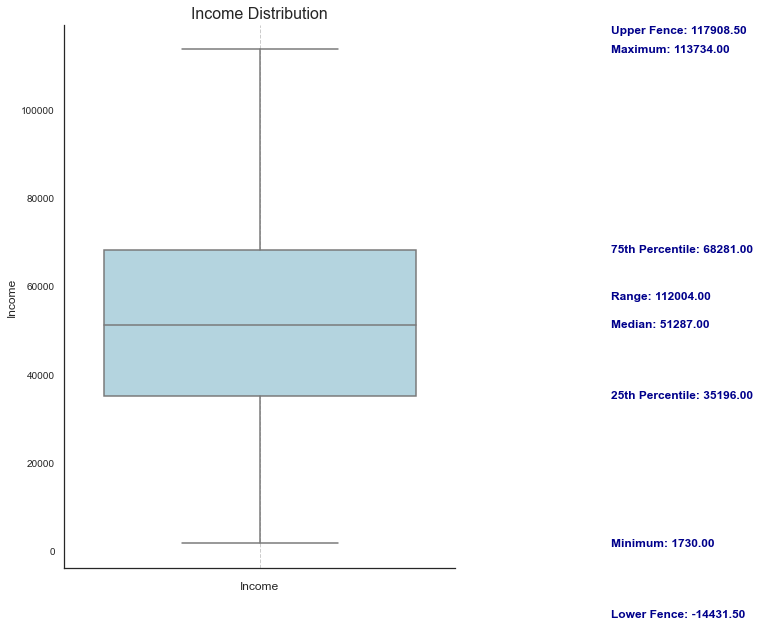

In [41]:
# income distribution
plt.figure(figsize=[7, 10])
sns.boxplot(y=df['Income'], color='lightblue', linewidth=1.5)

age_stats = df['Income'].describe()
q1 = age_stats['25%']
q3 = age_stats['75%']
median = age_stats['50%']
min_val = age_stats['min']
max_val = age_stats['max']
range_val = max_val - min_val

iqr = q3 - q1
outliers_income = df[(df['Income'] < q1 - 1.5 * iqr) | (df['Income'] > q3 + 1.5 * iqr)]['Income']

plt.text(0.9, q1, f'25th Percentile: {q1:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, median, f'Median: {median:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, q3, f'75th Percentile: {q3:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, min_val, f'Minimum: {min_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, max_val, f'Maximum: {max_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, min_val + (range_val / 2), f'Range: {range_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')

lower_fence = q1 - 1.5 * iqr
plt.text(0.9, lower_fence, f'Lower Fence: {lower_fence:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
upper_fence = q3 + 1.5 * iqr
plt.text(0.9, upper_fence, f'Upper Fence: {upper_fence:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')

plt.title('Income Distribution', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--')
sns.despine()
plt.show();

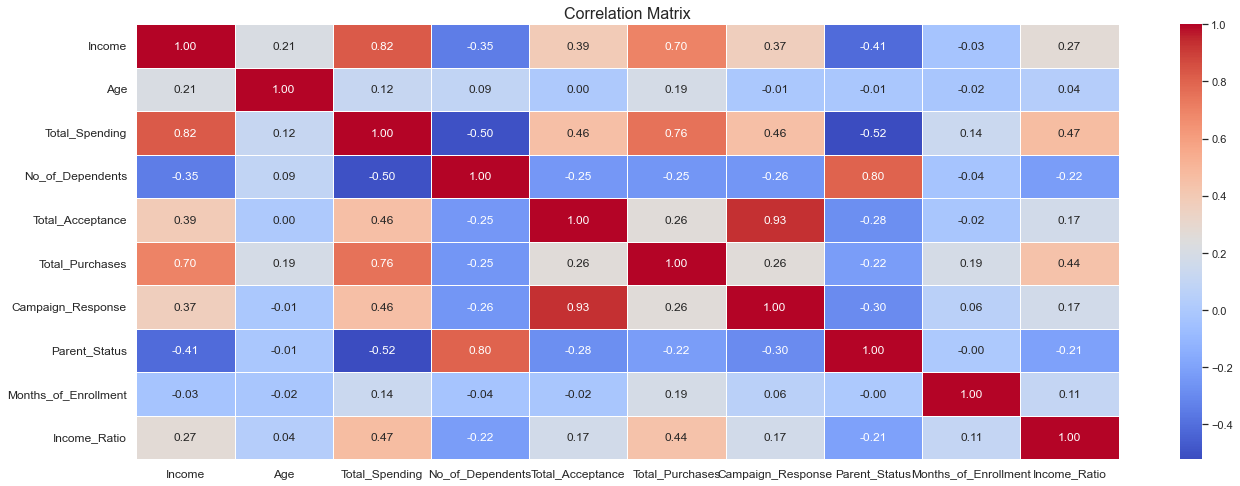

In [152]:
# now lets check item correlation after removing outliers
corr = df[['Income', 'Age', 'Total_Spending', 'No_of_Dependents', 'Total_Acceptance', 
              'Total_Purchases', 'Campaign_Response', 'Parent_Status', 'Months_of_Enrollment', 'Income_Ratio']].corr()
plt.figure(figsize=[22, 8])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

In [153]:
# apply label encoding and scale the dataset
le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.head()

ID    Income   Recency  Complain       Age  Total_Spending  \
0 -0.018923  0.314651  0.310830 -0.095673  1.017189        1.679323   
1 -1.050705 -0.254877 -0.380600 -0.095673  1.273530       -0.963897   
2 -0.444880  0.965354 -0.795458 -0.095673  0.333612        0.281242   
3  0.183737 -1.206087 -0.795458 -0.095673 -1.289883       -0.920675   
4 -0.080522  0.322136  1.555404 -0.095673 -1.033542       -0.307248   

   No_of_Dependents  Total_Acceptance  Months_of_Enrollment  \
0         -1.266589         -0.439991              1.939722   
1          1.403420         -0.439991             -1.723736   
2         -1.266589         -0.439991             -0.153683   
3          0.068415         -0.439991             -1.985412   
4          0.068415         -0.439991             -0.807872   

   Purchasing_Channel  Total_Purchases  Website_Activity  Campaign_Response  \
0           -2.189411         1.328161          1.573210           0.614920   
1           -0.362140        -1.167390         -0.972274          -0.503808   
2           -0.362140         0.802782          0.724716          -0.503808   
3           -0.362140        -0.904700         -0.406610          -0.503808   
4           -0.362140         0.540092          0.159053          -0.503808   

   Marital_Status_New  Education_Level  Parent_Status  Income_Ratio  
0           -1.347625        -0.892338       -1.58466      1.061409  
1           -1.347625        -0.892338        0.63105     -0.555254  
2            0.742046        -0.892338       -1.58466      0.053487  
3            0.742046        -0.892338        0.63105     -0.471754  
4            0.742046         0.571654        0.63105     -0.160049

## Dimensionality Reduction Using Principal Component Analysis
Dimensionality reduction is a technique used to reduce the number of features or variables in a dataset while preserving the essential information. It aims to simplify the data representation by identifying and capturing the most important patterns and relationships in the data. <br>
it is worth noting that in this dataset, there are highly correlated values among the features in the dataset. This high correlation can lead to multicollinearity issues, where the presence of redundant information can negatively affect the clustering algorithm's performance. <br><br>
One commonly used technique for dimensionality reduction is Principal Component Analysis (PCA), which transforms the original features into a new set of orthogonal variables called principal components. These components capture the maximum variance in the data, allowing for a lower-dimensional representation. Here, I used PCA not only for dimensionality reduction but also to mitigate the impact of highly correlated features, resulting in a more robust and accurate clustering analysis.

In [51]:
df

ID   Income  Recency  Complain  Age  Total_Spending  \
0      5524  58138.0       58         0   58            1617   
1      2174  46344.0       38         0   61              27   
2      4141  71613.0       26         0   50             776   
3      6182  26646.0       26         0   31              53   
4      5324  58293.0       94         0   34             422   
...     ...      ...      ...       ...  ...             ...   
2235  10870  61223.0       46         0   48            1341   
2236   4001  64014.0       56         0   69             444   
2237   7270  56981.0       91         0   34            1241   
2238   8235  69245.0        8         0   59             843   
2239   9405  52869.0       40         0   61             172   

      No_of_Dependents  Total_Acceptance  Months_of_Enrollment  \
0                    0                 0                    32   
1                    2                 0                     4   
2                    0                 0                    16   
3                    1                 0                     2   
4                    1                 0                    11   
...                ...               ...                   ...   
2235                 1                 0                    18   
2236                 3                 1                     2   
2237                 0                 1                    11   
2238                 1                 0                    11   
2239                 2                 0                    26   

      Purchasing_Channel  Total_Purchases  Website_Activity  \
0                      0               25                15   
1                      1                6                 6   
2                      1               21                12   
3                      1                8                 8   
4                      1               19                10   
...                  ...              ...               ...   
2235                   2               18                14   
2236                   2               22                15   
2237                   1               19                 8   
2238                   1               23                 9   
2239                   1               11                10   

      Campaign_Response  Marital_Status_New  Education_Level  Parent_Status  \
0                     1                   0                0              0   
1                     0                   0                0              1   
2                     0                   1                0              0   
3                     0                   1                0              1   
4                     0                   1                1              1   
...                 ...                 ...              ...            ...   
2235                  0                   1                0              1   
2236                  1                   1                1              1   
2237                  1                   0                0              0   
2238                  0                   1                1              1   
2239                  1                   1                1              1   

      Income_Ratio  
0         0.027813  
1         0.000583  
2         0.010836  
3         0.001989  
4         0.007239  
...            ...  
2235      0.021904  
2236      0.006936  
2237      0.021779  
2238      0.012174  
2239      0.003253  

[2205 rows x 17 columns]

In [52]:
df_scaled

ID    Income   Recency  Complain       Age  Total_Spending  \
0    -0.018923  0.314651  0.310830 -0.095673  1.017189        1.679323   
1    -1.050705 -0.254877 -0.380600 -0.095673  1.273530       -0.963897   
2    -0.444880  0.965354 -0.795458 -0.095673  0.333612        0.281242   
3     0.183737 -1.206087 -0.795458 -0.095673 -1.289883       -0.920675   
4    -0.080522  0.322136  1.555404 -0.095673 -1.033542       -0.307248   
...        ...       ...       ...       ...       ...             ...   
2200  1.627616  0.463624 -0.104028 -0.095673  0.162718        1.220500   
2201 -0.487999  0.598401  0.241687 -0.095673  1.957107       -0.270675   
2202  0.518836  0.258780  1.451690 -0.095673 -1.033542        1.054260   
2203  0.816050  0.851004 -1.417746 -0.095673  1.102636        0.392623   
2204  1.176404  0.060213 -0.311457 -0.095673  1.273530       -0.722849   

      No_of_Dependents  Total_Acceptance  Months_of_Enrollment  \
0            -1.266589         -0.439991              1.939722   
1             1.403420         -0.439991             -1.723736   
2            -1.266589         -0.439991             -0.153683   
3             0.068415         -0.439991             -1.985412   
4             0.068415         -0.439991             -0.807872   
...                ...               ...                   ...   
2200          0.068415         -0.439991              0.107993   
2201          2.738424          1.029979             -1.985412   
2202         -1.266589          1.029979             -0.807872   
2203          0.068415         -0.439991             -0.807872   
2204          1.403420         -0.439991              1.154696   

      Purchasing_Channel  Total_Purchases  Website_Activity  \
0              -2.189411         1.328161          1.573210   
1              -0.362140        -1.167390         -0.972274   
2              -0.362140         0.802782          0.724716   
3              -0.362140        -0.904700         -0.406610   
4              -0.362140         0.540092          0.159053   
...                  ...              ...               ...   
2200            1.465132         0.408747          1.290379   
2201            1.465132         0.934126          1.573210   
2202           -0.362140         0.540092         -0.406610   
2203           -0.362140         1.065471         -0.123779   
2204           -0.362140        -0.510666          0.159053   

      Campaign_Response  Marital_Status_New  Education_Level  Parent_Status  \
0              0.614920           -1.347625        -0.892338       -1.58466   
1             -0.503808           -1.347625        -0.892338        0.63105   
2             -0.503808            0.742046        -0.892338       -1.58466   
3             -0.503808            0.742046        -0.892338        0.63105   
4             -0.503808            0.742046         0.571654        0.63105   
...                 ...                 ...              ...            ...   
2200          -0.503808            0.742046        -0.892338        0.63105   
2201           0.614920            0.742046         0.571654        0.63105   
2202           0.614920           -1.347625        -0.892338       -1.58466   
2203          -0.503808            0.742046         0.571654        0.63105   
2204           0.614920            0.742046         0.571654        0.63105   

      Income_Ratio  
0         1.061409  
1        -0.555254  
2         0.053487  
3        -0.471754  
4        -0.160049  
...            ...  
2200      0.710559  
2201     -0.178057  
2202      0.703177  
2203      0.132932  
2204     -0.396694  

[2205 rows x 17 columns]

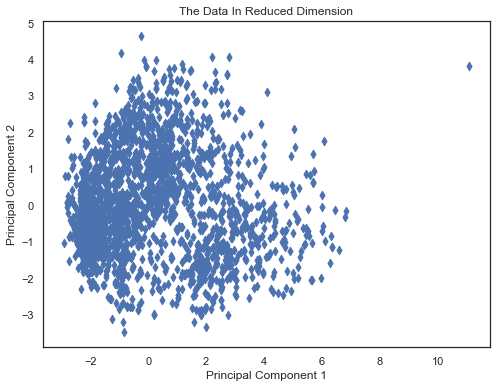

In [154]:
# copy the dataset into a new variable X
X = df_scaled.copy()

# Apply PCA for dimensionality reduction. Keep 2 componenets
pca = PCA(n_components=2)

#Fit the model with X and apply the dimensionality reduction on X.
X_pca = pca.fit_transform(X)

# Plot the reduced dimension using PCA
plt.figure(figsize=[8, 6])
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='d')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('The Data In Reduced Dimension')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


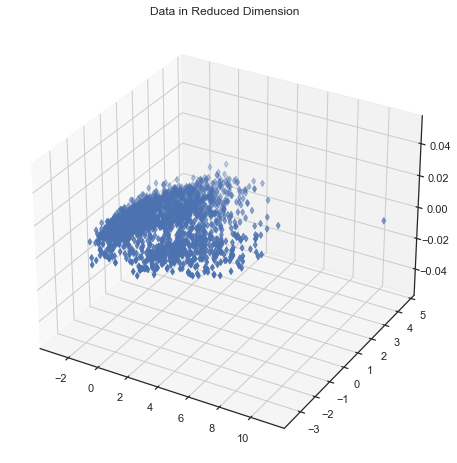

In [155]:
fig = plt.figure(figsize=(10, 8))
x, y = X_pca[:, 0], X_pca[:, 1]
color = sns.color_palette()[0]
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y, c=color, marker="d")
ax.set_title('Data in Reduced Dimension')
plt.show()

## Checking the optimal number of clusters
To check the optimal number of clusters, we use the following evaluation techniques namely;
<ul>
    <li>Elbow Curve method</li>
    <li>Silhouette score Curve method</li>
    <li>Calinski-Harabasz index curve</li>
</ul>

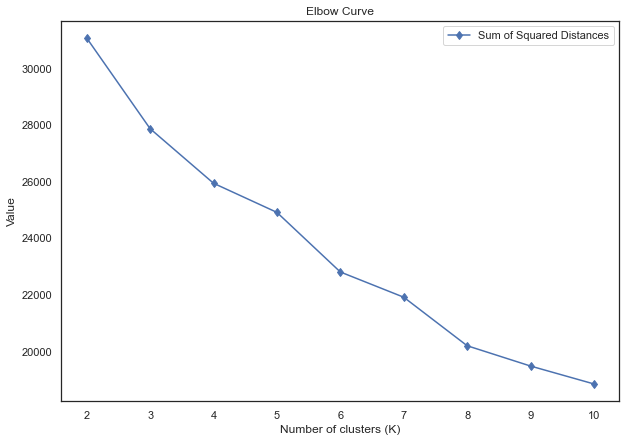

The optimal number of clusters (Elbow method) is: 5


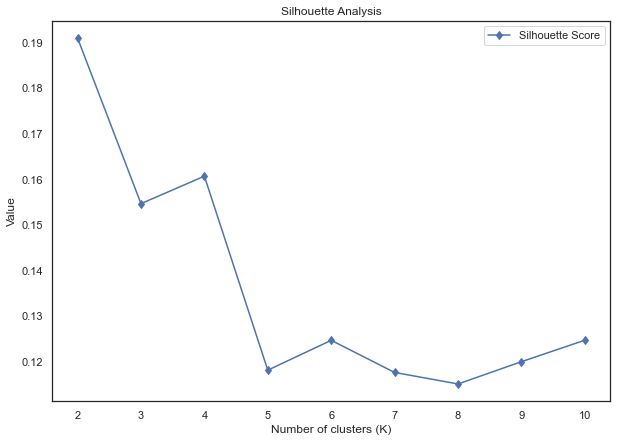

The optimal number of clusters (Silhouette method) is: 2


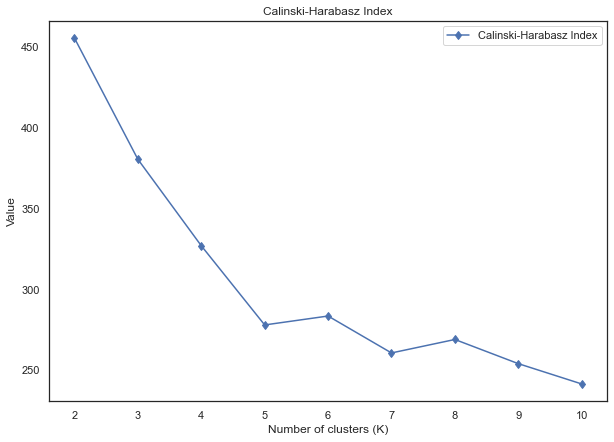

The optimal number of clusters (Calinski-Harabasz method) is: 2


In [156]:
min_clusters = 2
max_clusters = 10
distortions = []
silhouette_scores = []
ch_scores = []

# Fit K-means and compute the sum of squared distances, silhouette scores, and CH scores
for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(df_scaled, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=[10, 7])
plt.plot(range(min_clusters, max_clusters + 1), distortions, marker='d', label='Sum of Squared Distances')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Value')
plt.title('Elbow Curve')
plt.legend()
plt.show()

rate_of_change = np.diff(distortions)
rate_of_change_ratio = rate_of_change[1:] / rate_of_change[:-1]
optimal_k_elbow = np.argmax(rate_of_change_ratio) + min_clusters + 1

# Print the optimal number of clusters based on the elbow method
print(f"The optimal number of clusters (Elbow method) is: {optimal_k_elbow}")

# Plot the silhouette scores
plt.figure(figsize=[10, 7])
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='d', label='Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Value')
plt.title('Silhouette Analysis')
plt.legend()
plt.show()

# Identify the optimal number of clusters using silhouette score
optimal_k_silhouette = np.argmax(silhouette_scores) + min_clusters

# Print the optimal number of clusters based on the silhouette method
print(f"The optimal number of clusters (Silhouette method) is: {optimal_k_silhouette}")

# Plot the Calinski-Harabasz scores
plt.figure(figsize=[10, 7])
plt.plot(range(min_clusters, max_clusters + 1), ch_scores, marker='d', label='Calinski-Harabasz Index')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Value')
plt.title('Calinski-Harabasz Index')
plt.legend()
plt.show()

# Identify the optimal number of clusters using Calinski-Harabasz index
optimal_k_ch = np.argmax(ch_scores) + min_clusters

# Print the optimal number of clusters based on the Calinski-Harabasz index
print(f"The optimal number of clusters (Calinski-Harabasz method) is: {optimal_k_ch}")

In this case, we would prioritize the Silhouette method and the Calinski-Harabasz method, as they both provide insights into the quality and separation of the clusters. <br>
The **Silhouette method** suggests 2 aclusters, indicating that the data points within each cluster are relatively well-separated from points in other clusters. This could imply a clear distinction between two major customer segments. <br>
The **Calinski-Harabasz method** also suggests 2 clusters, indicating a high inter-cluster variance compared to the intra-cluster variance. This suggests that the clusters are well-separated and distinct from each other.

After performing dimensionality reduction using PCA and also finding the optimal number of Clusters, we will cluster the data and visualize it using the `Agglomerative Clustering algorithm.`

## Agglomerative Clustering

Now that I have reduced the attributes to two dimensions, I will be performing segmentation by clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved. And since we have `2` to be the optimal number of clusters from the methods we used above, we will set it to 2 in the Agglomerative Clustering.

Cluster Counts:
1    1139
0    1066
Name: Cluster, dtype: int64


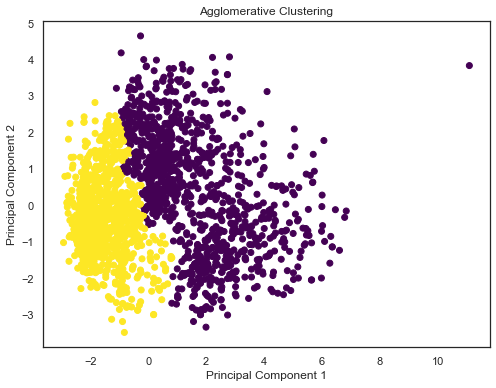

In [157]:
# Fit Agglomerative Clustering model
clustering = AgglomerativeClustering(n_clusters=2)
clustering.fit_predict(X_pca)

# Obtain cluster labels
cluster_labels = clustering.labels_

# Add the cluster labels to the original dataframe
df_clustered = df_scaled.copy()
df_clustered['Cluster'] = cluster_labels

# Analyze Clusters
cluster_counts = df_clustered['Cluster'].value_counts()
print('Cluster Counts:')
print(cluster_counts)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Now lets have a visual distribution of the Clusters.

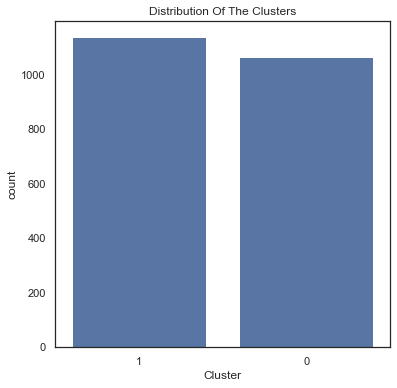

In [158]:
plt.figure(figsize=[6, 6])
order = df_clustered['Cluster'].value_counts().index
color = sns.color_palette()[0]
pl = sns.countplot(x=df_clustered["Cluster"], color=color, order=order)
pl.set_title("Distribution Of The Clusters")
plt.show()

We can see that the clusters are evenly distributed.

In [159]:
# Evaluate clustering results
# silhouette_avg = silhouette_score(X_pca, cluster_labels)
# print(f"Silhouette Score: {silhouette_avg:.3f}")

# # Calculate cluster means
# cluster_means = df_clustered.groupby('Cluster').mean()
# print('\nCluster Means:')
# display(cluster_means)

## Cluster Profiling

In [174]:
# Add cluster labels to original dataset
clusters = cluster_labels
df['Clusters'] = clusters.astype(int)

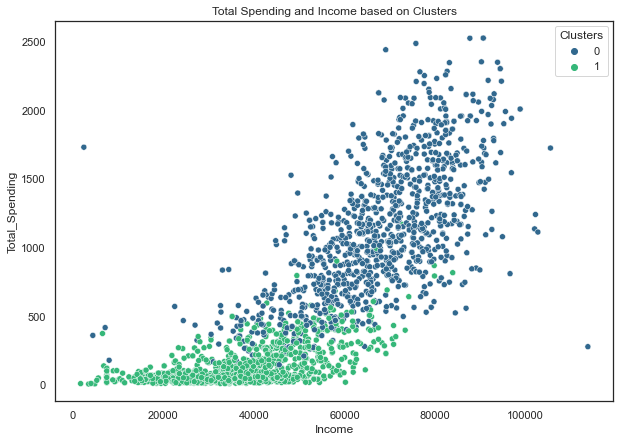

In [183]:
plt.figure(figsize=[10, 7])
sns.scatterplot(data=df, x='Income', y='Total_Spending', hue='Clusters', palette='viridis')
plt.title('Total Spending and Income based on Clusters')
plt.show()

**Insights:** <br>
Cluster 0: High Income and High Spending <br>
Cluster 1: Low Income and Low Spending

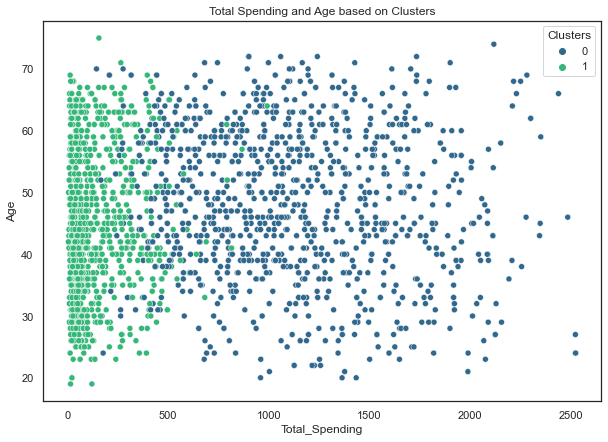

In [184]:
plt.figure(figsize=[10, 7])
sns.scatterplot(data=df, x='Total_Spending', y='Age', hue='Clusters', palette='viridis')
plt.title('Total Spending and Age based on Clusters')
plt.show();

**Insights:** <br>
Cluster 0: High Age and Low Spending <br>
Cluster 1: High Age and High Spending

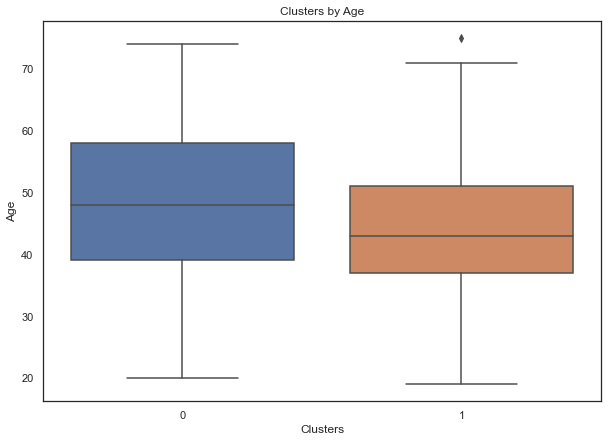

In [185]:
plt.figure(figsize=[10, 7])
sns.boxplot(data=df, x='Clusters', y='Age')
plt.title('Clusters by Age')
plt.show();

**Insights:** <br>


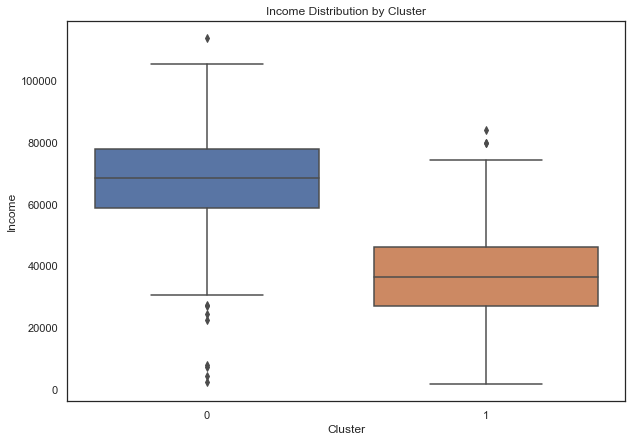

In [187]:
plt.figure(figsize=[10, 7])
sns.boxplot(data=df, x='Clusters', y='Income')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.title('Income Distribution by Cluster')
plt.show()

**Insights:** <br>


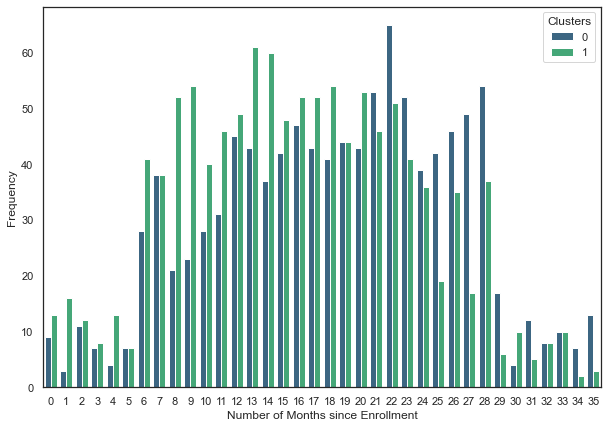

In [189]:
plt.figure(figsize=[10, 7])
sns.countplot(data=df, x='Months_of_Enrollment', hue='Clusters', palette='viridis')
plt.xlabel('Number of Months since Enrollment')
plt.ylabel('Frequency')
plt.show();

**Insights:** <br>


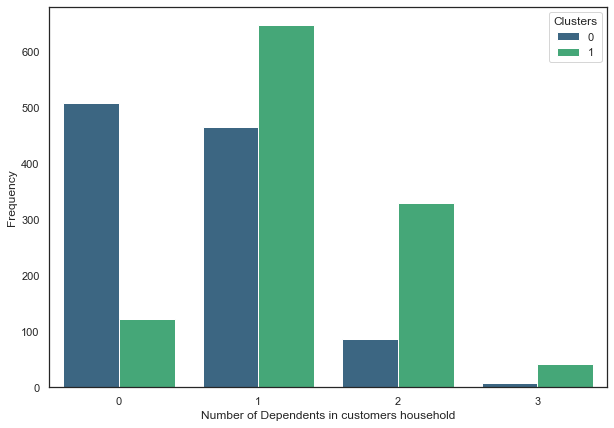

In [192]:
plt.figure(figsize=[10, 7])
sns.countplot(data=df, x='No_of_Dependents', hue='Clusters', palette='viridis')
plt.xlabel('Number of Dependents in customers household')
plt.ylabel('Frequency')
plt.show();

**Insights:** <br>


In [195]:
fig = px.scatter_3d(df, x='Income', y='Total_Spending', z='Total_Purchases', color='Clusters')
fig.show()

**Insights:** <br>


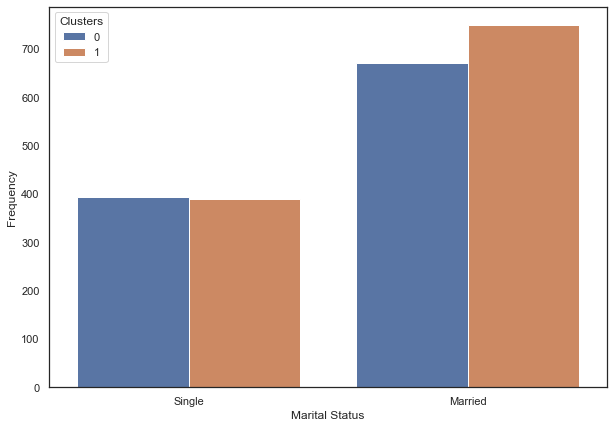

In [200]:
# Marital Status
plt.figure(figsize=[10, 7])
sns.countplot(data=df, x='Marital_Status_New', hue='Clusters')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Single', 'Married'])
plt.show();

**Insights:** <br>

